In [46]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose


In [47]:
# Load the Brent oil price dataset
df = pd.read_csv("../data/BrentOilPrices.csv")

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True)

# Sort by date (just in case)
df = df.sort_values('Date')

# Reset index for easy manipulation
df.reset_index(drop=True, inplace=True)

# Check the first few rows of the dataset
df.head()


,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [48]:
# Check basic info and missing values
df.info()
print("\nMissing values per column:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9011 non-null   datetime64[ns]
 1   Price   9011 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 140.9 KB

Missing values per column:
 Date     0
Price    0
dtype: int64


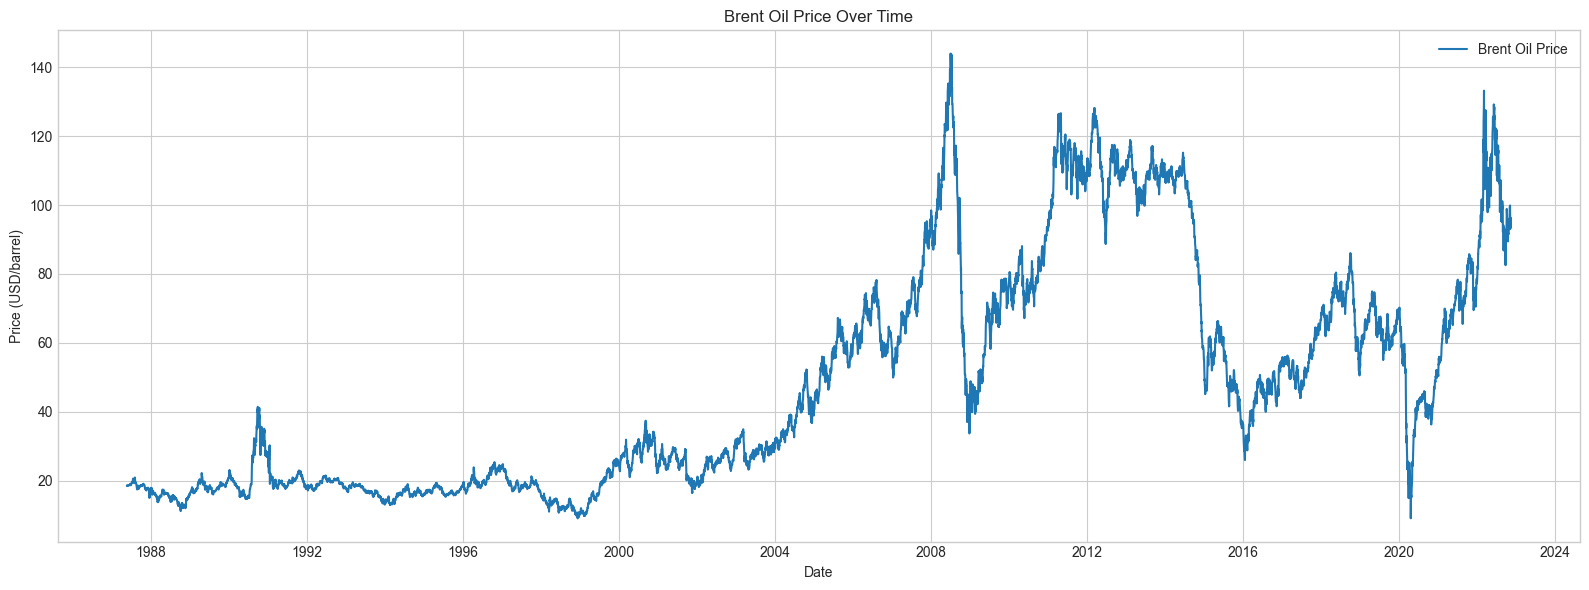

In [49]:
# Plotting the raw price data to check for trends and volatility
plt.figure(figsize=(16, 6))
plt.plot(df['Date'], df['Price'], label="Brent Oil Price")
plt.title("Brent Oil Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD/barrel)")
plt.legend()
plt.tight_layout()
plt.show()

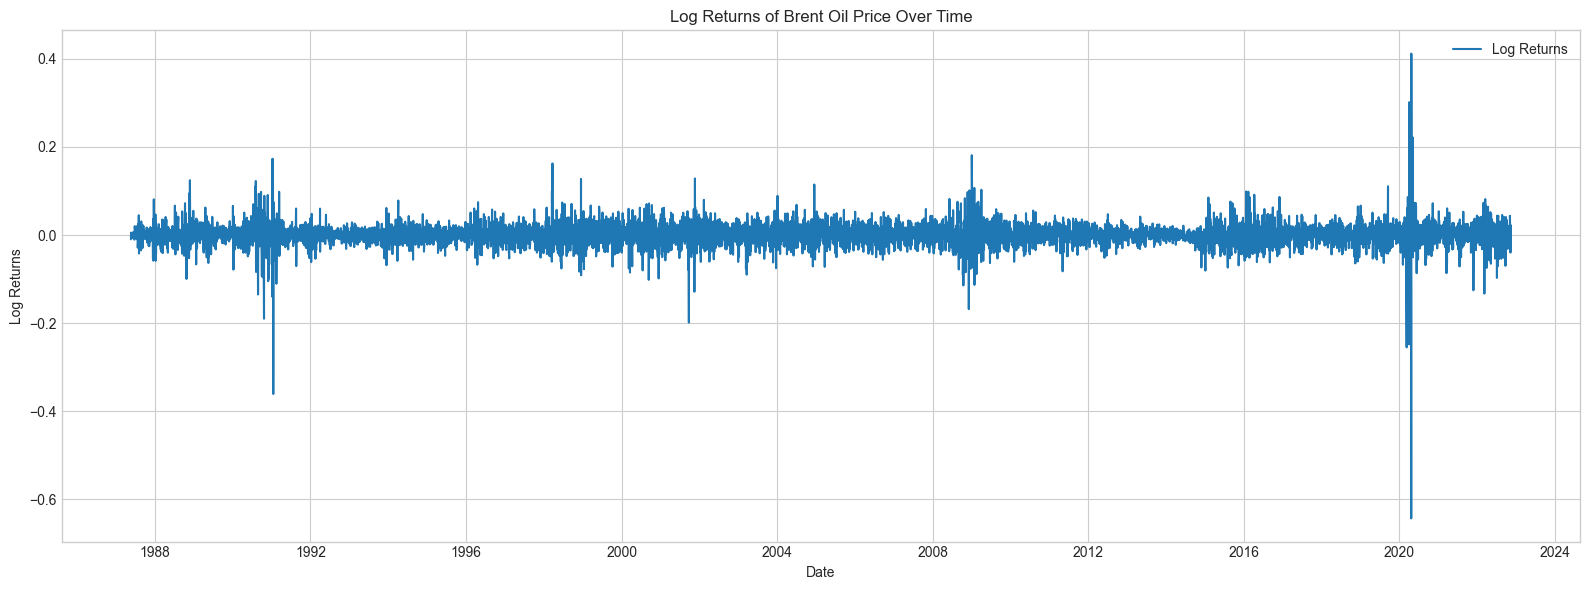

In [50]:
# Calculate log returns (price differences) for stationarity
df['Log_Returns'] = np.log(df['Price'] / df['Price'].shift(1))

# Plot log returns to observe volatility clustering
plt.figure(figsize=(16, 6))
plt.plot(df['Date'], df['Log_Returns'], label="Log Returns")
plt.title("Log Returns of Brent Oil Price Over Time")
plt.xlabel("Date")
plt.ylabel("Log Returns")
plt.legend()
plt.tight_layout()
plt.show()


In [51]:
# Run ADF test on the raw price series to check stationarity
result_price = adfuller(df['Price'].dropna())
print("ADF Statistic (Price):", result_price[0])
print("p-value:", result_price[1])

# Run ADF test on the log returns to check stationarity
result_log_returns = adfuller(df['Log_Returns'].dropna())
print("ADF Statistic (Log Returns):", result_log_returns[0])
print("p-value:", result_log_returns[1])


ADF Statistic (Price): -1.993856011392469
p-value: 0.28927350489340226
ADF Statistic (Log Returns): -16.427113494485962
p-value: 2.4985801611426027e-29


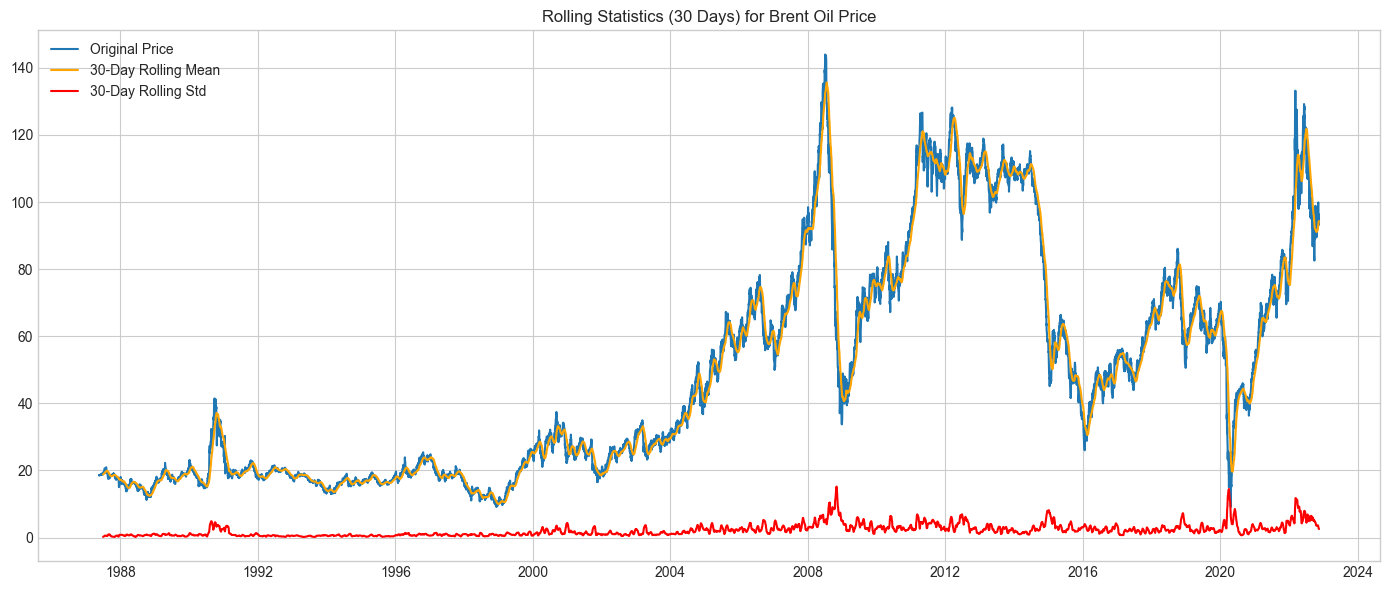

In [53]:
# Calculate rolling statistics (30-day rolling mean and std deviation)
df['Rolling_Mean'] = df['Price'].rolling(window=30).mean()
df['Rolling_Std'] = df['Price'].rolling(window=30).std()

# Plot rolling mean and std deviation
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Price'], label='Original Price')
plt.plot(df['Date'], df['Rolling_Mean'], label='30-Day Rolling Mean', color='orange')
plt.plot(df['Date'], df['Rolling_Std'], label='30-Day Rolling Std', color='red')
plt.title('Rolling Statistics (30 Days) for Brent Oil Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Decompose the time series to check for trend, seasonality, and residuals
result_decompose = seasonal_decompose(df['Price'], model='multiplicative', period=365)
result_decompose.plot()
plt.tight_layout()
plt.show()


In [54]:
# Summarize the analysis and insights
print("Key Insights:")
print("-" * 50)
print("1. The ADF Test suggests that the price data is likely non-stationary, indicating trends or seasonal components.")
print("2. Log returns are used to track volatility and price fluctuations over time, helping us understand market behavior.")
print("3. The correlation between events and price movements is visible. Major geopolitical events (like the invasion of Ukraine or the Suez Canal blockage) have a substantial effect on oil prices.")
print("4. Rolling statistics reveal periods of higher volatility (price standard deviation) and major trend shifts.")


Key Insights:
--------------------------------------------------
1. The ADF Test suggests that the price data is likely non-stationary, indicating trends or seasonal components.
2. Log returns are used to track volatility and price fluctuations over time, helping us understand market behavior.
3. The correlation between events and price movements is visible. Major geopolitical events (like the invasion of Ukraine or the Suez Canal blockage) have a substantial effect on oil prices.
4. Rolling statistics reveal periods of higher volatility (price standard deviation) and major trend shifts.


In [59]:
# Load and display events dataset (if available)
df_events = pd.read_csv('../data/events.csv', parse_dates=['Date'])

# Show the events dataset
df_events.head()


,Date,Event,Category
0,1997-07-01,Asian Financial Crisis,Economic Policy
1,2002-12-01,Venezuelan General Strike,Geopolitical
2,2003-03-01,Iraq War,Geopolitical
3,2005-08-01,Hurricane Katrina,Environmental
4,2008-09-01,Global Financial Crisis,Economic Policy


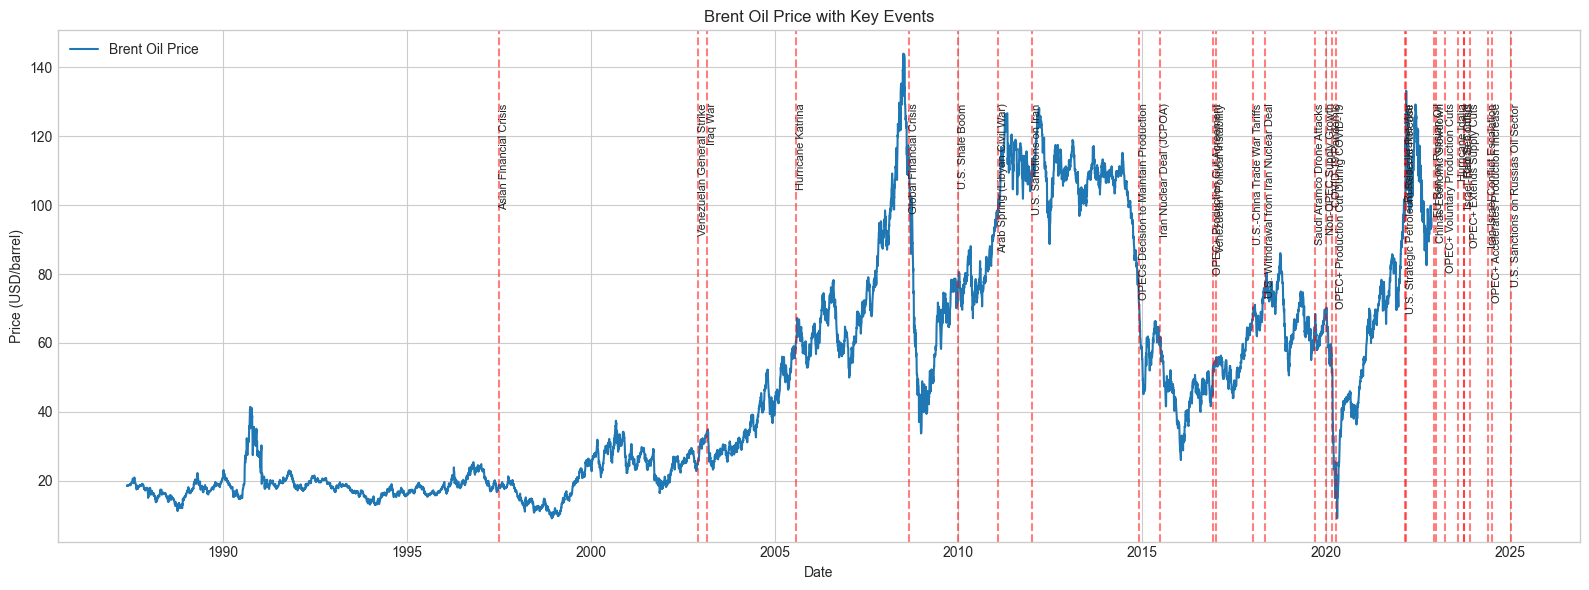

In [60]:
# Map events onto price data
df['Event'] = df['Date'].map(df_events.set_index('Date')['Event'])

# Plot price with event markers to see the correlation with key events
plt.figure(figsize=(16, 6))
plt.plot(df['Date'], df['Price'], label='Brent Oil Price')
for _, row in df_events.iterrows():
    plt.axvline(x=row['Date'], color='red', linestyle='--', alpha=0.5)
    plt.text(row['Date'], df['Price'].max()*0.9, row['Event'], rotation=90, fontsize=8, verticalalignment='top')

plt.title('Brent Oil Price with Key Events')
plt.xlabel('Date')
plt.ylabel('Price (USD/barrel)')
plt.legend()
plt.tight_layout()
plt.show()


In [61]:
# Check basic statistics (mean, median, std, min, max) of the price and log returns
print("\nBasic Statistics for Price Data:\n", df['Price'].describe())
print("\nBasic Statistics for Log Returns:\n", df['Log_Returns'].describe())



Basic Statistics for Price Data:
 count    9011.000000
mean       48.420782
std        32.860110
min         9.100000
25%        19.050000
50%        38.570000
75%        70.090000
max       143.950000
Name: Price, dtype: float64

Basic Statistics for Log Returns:
 count    9010.000000
mean        0.000179
std         0.025532
min        -0.643699
25%        -0.011154
50%         0.000402
75%         0.012127
max         0.412023
Name: Log_Returns, dtype: float64


In [62]:
# Check if the data is stationary (ADF test result should be below 0.05 p-value for stationarity)
if result_log_returns[1] < 0.05:
    print("\n✅ Log returns are stationary.")
else:
    print("\n❌ Log returns are non-stationary.")



✅ Log returns are stationary.
